In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font",family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc("axes",unicode_minus=False)

In [2]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### 의사결정나무_과제
데이터를 불러온 후 중복값을 확인하기 위해 duplicated를 사용한 결과 25개의 중복값을 확인하였고 drop_duplicates를 활용하여 중복값들을 하나씩만 남겨두고 제거하였다. 그 결과 train은 99.9%, test 83.3%로 이미 좋다고 생각할 수 있으나 조금 더 나은 설명력을 출력하기 위해 모델 Parameter를 조정해 줄 예정이다.

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/Concrete.csv",encoding='euc-kr')
df_raw

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
#중복값 확인하기
df_raw[df_raw.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [5]:
# 중복값들의 첫번째 데이터만 남겨두고 제거
df_raw=df_raw.drop_duplicates()
df_raw

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [7]:
# 데이터 분할 -> train,test데이터 6:4 비율로 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=100)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(603, 8)
train data Y size:(603,)
test data X size:(402, 8)
test data Y size:(402,)


In [8]:
tree_uncustomized=DecisionTreeRegressor(random_state=100)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeRegressor(random_state=100)

In [9]:
# train, test 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.999
Score on test set: 0.833


In [10]:
# train 및 test 설명력 결과 저장
train_score=[];test_score=[]
# 잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=100,
                              min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
# 결과 저장    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinsSampleLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

df_score_leaf.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,1,0.999,0.833
1,2,0.981,0.825
2,3,0.966,0.818
3,4,0.950,0.815
4,5,0.930,0.812
5,6,0.916,0.798
6,7,0.893,0.795
7,8,0.887,0.803
8,9,0.873,0.803
9,10,0.858,0.806


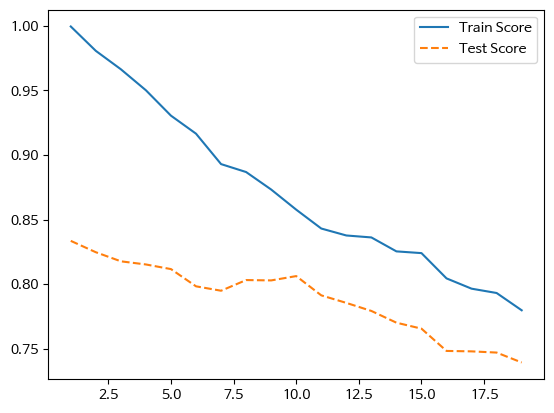

In [11]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

모델 설명력과 그래프를 확인해 본 후 trainScore와 TestScore의 차이가 작고, 설명력이 높으면서, leaf가 너무 작지도 크지도 않눈  Train/test 데이터의 성능 변화를 고려하터 적당한 leaf값 10을 선택하였다.  
+) random_state값은 100으로 선택하였다.

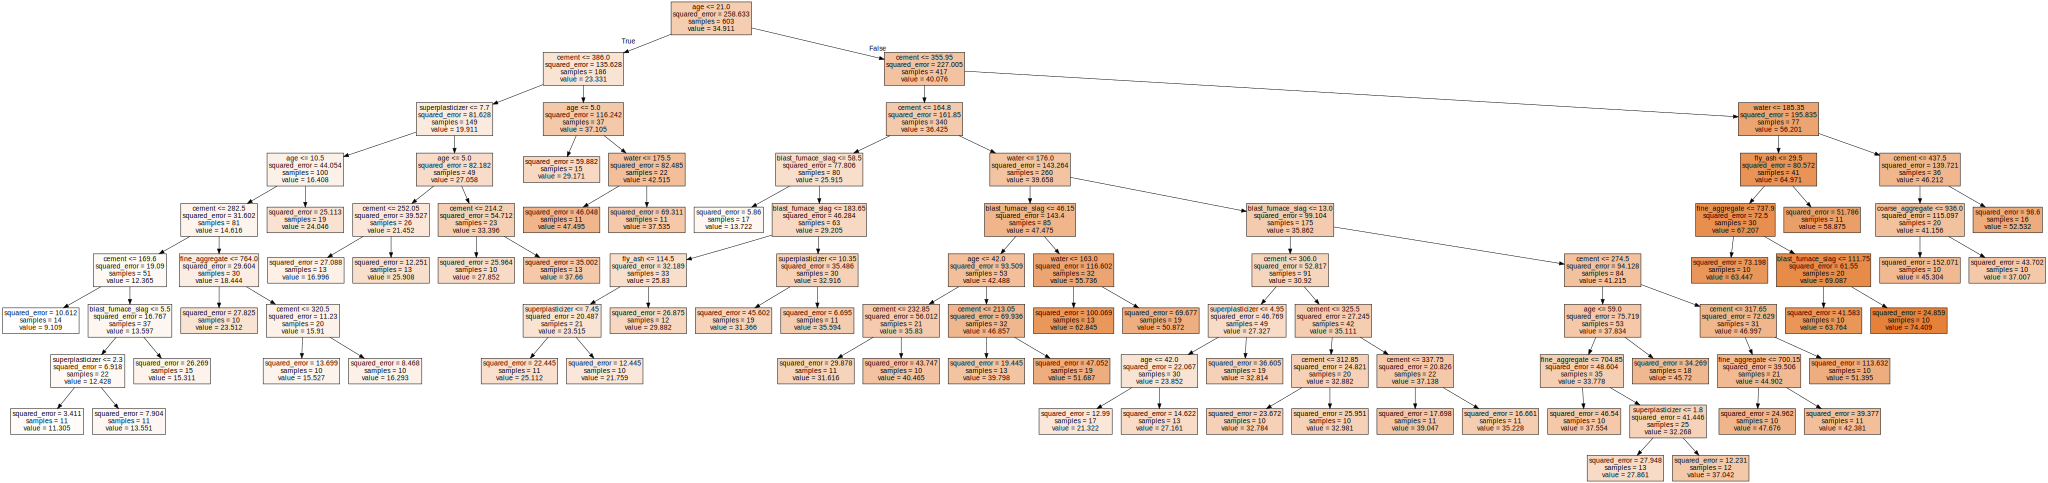

In [12]:
# 변수명 저장
v_feature_name=df_train_x.columns
# 노드의 최소 자료 수 = 10 모델
tree_graph=DecisionTreeRegressor(random_state=100,min_samples_leaf=10)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
# train 및 test 설명력 결과 저장
train_score=[];test_score=[]
# 분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=100, min_samples_leaf=10,
                              min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

# 결과 저장 
df_score_split=pd.DataFrame()
df_score_split["MinsSampleSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinsSampleSplit,TrainScore,TestScore
0,4,0.858,0.806
1,6,0.858,0.806
2,8,0.858,0.806
3,10,0.858,0.806
4,12,0.858,0.806
5,14,0.858,0.806
6,16,0.858,0.806
7,18,0.858,0.806
8,20,0.858,0.806
9,22,0.848,0.791


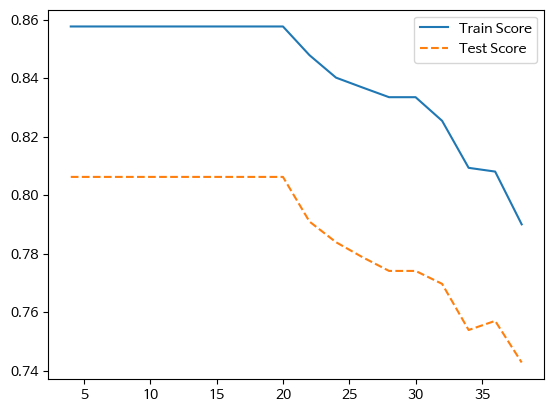

In [14]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.legend()

모델 설명력과 그래프를 확인해 본 결과 분리 노드의 최소 자료 수 증가에 다라 모델의 설명력은 감소하였고, Train/Test 데이터의 성능 변화를 고려하여 28을 선택하였다.

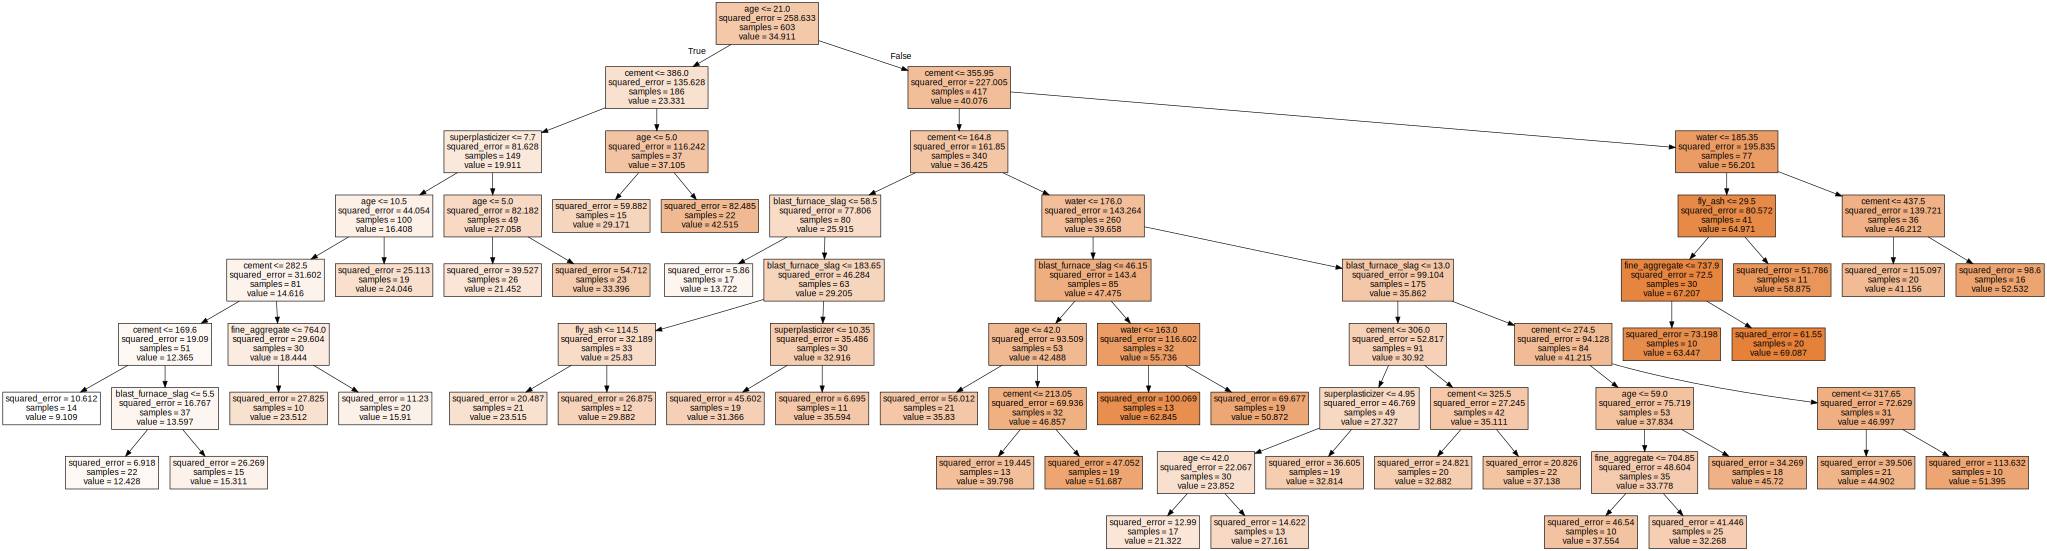

In [15]:
# 노드의 최소 자료 수 = 28모델
tree_graph=DecisionTreeRegressor(random_state=100,min_samples_leaf=10,min_samples_split=28)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [16]:
# train 및 test 설명력 결과 저장
train_score=[];test_score=[]
# 분리 노드의 최소 자료 수
para_depth=[n_depth*1 for n_depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=100,min_samples_leaf=10,min_samples_split=28,
                              max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth["MinsSampleLeaf"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

df_score_depth.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,1,0.231,0.292
1,2,0.445,0.481
2,3,0.596,0.602
3,4,0.697,0.691
4,5,0.760,0.737
5,6,0.803,0.757
6,7,0.831,0.773
7,8,0.833,0.774
8,9,0.833,0.774
9,10,0.833,0.774


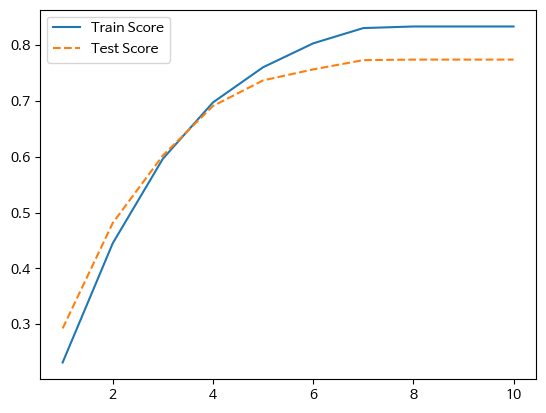

In [17]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.legend()

train의 학습이 더 중요함으로 앞쪽의 그래프가 겹쳐지는 부분의 값 보다는 차이가 일정해지는 부분즈음의 값으로 설정하는 것이 좋다고 생각 하여, 최대 깊이 증가에 따라 모델의 설명력은 증가하며 Train/test 데이터의 성능 변화를 고려하여 7을 선택하였다.

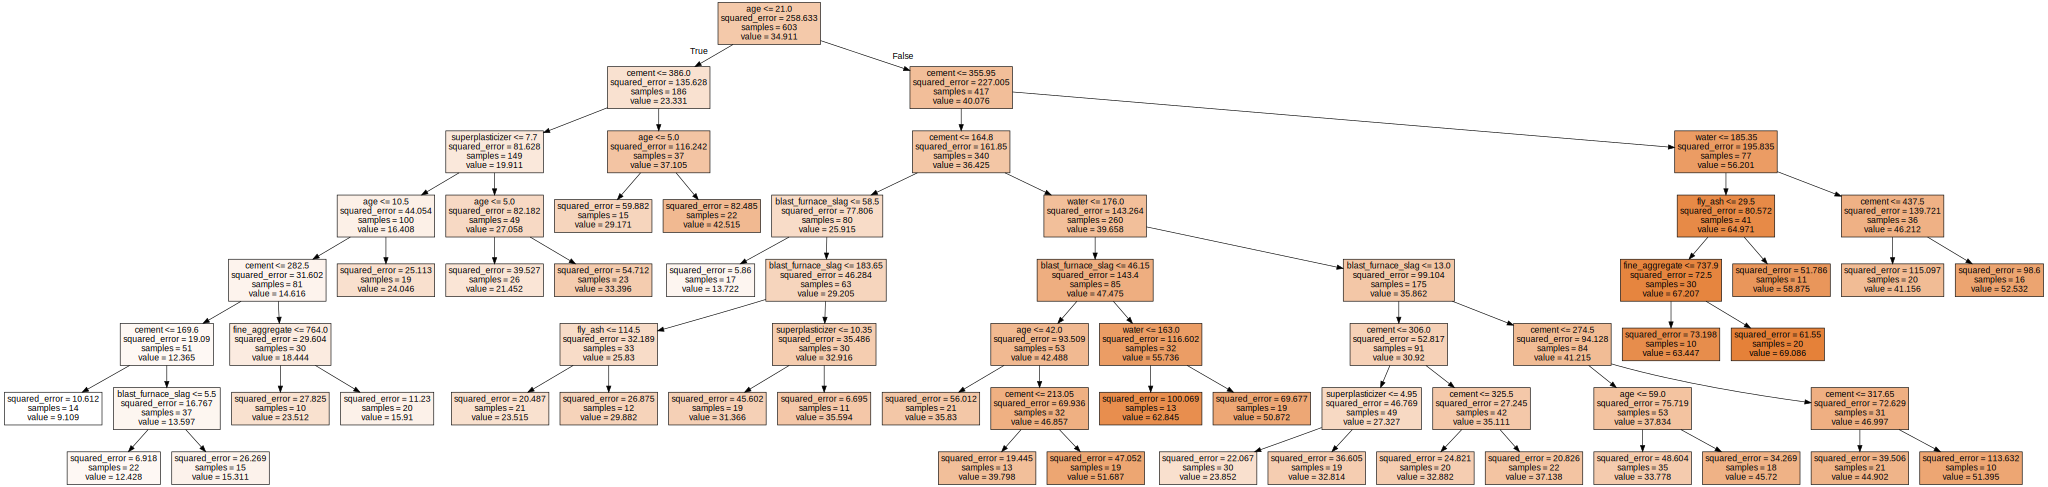

In [18]:
# 최대 길이 = 7 모델
tree_graph=DecisionTreeRegressor(random_state=100,min_samples_leaf=10,min_samples_split=28,max_depth=7)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_depth.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
# 최종 모델
tree_final=DecisionTreeRegressor(min_samples_leaf=10,min_samples_split=28,max_depth=7,random_state=100)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=28,
                      random_state=100)

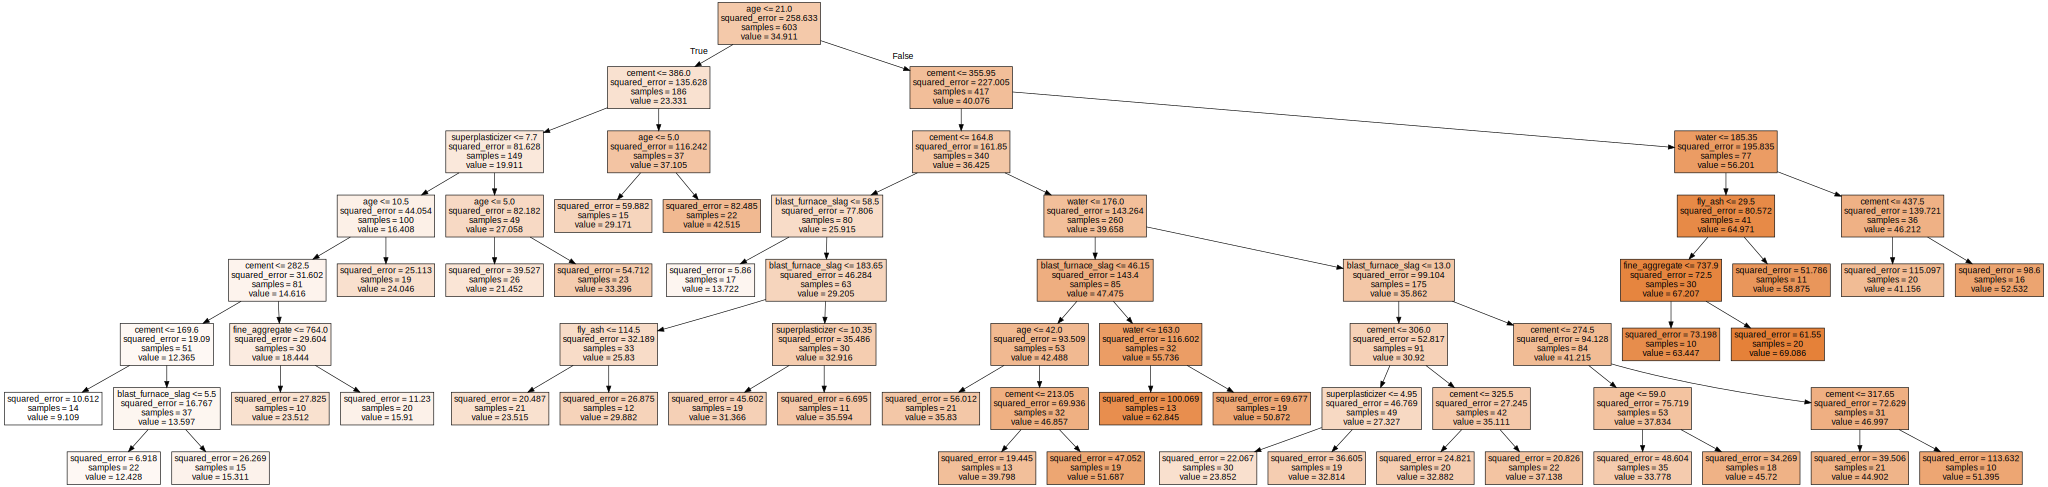

In [20]:
# 최종 모델 시각화 
export_graphviz(tree_final,out_file="tree_final.dot",
                feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [21]:
# 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

# 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,cement,0.398
7,age,0.340
3,water,0.120
1,blast_furnace_slag,0.094
4,superplasticizer,0.037
2,fly_ash,0.007
6,fine_aggregate,0.005
5,coarse_aggregate,0.000


Text(0, 0.5, '변수')

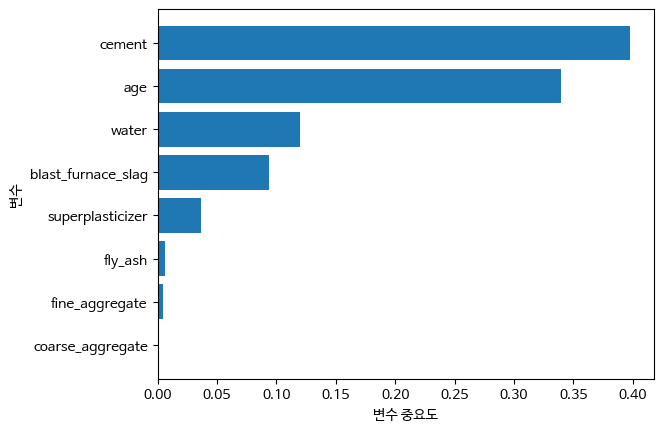

In [22]:
# 설명변수 중요도 그래프 / 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [23]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.831
Score on test set: 0.773


In [24]:
train_pred=tree_final.predict(df_train_x)
test_pred=tree_final.predict(df_test_x)
print("train data의 결정계수:",r2_score(df_train_y,train_pred))
print("test data의 결정계수:",r2_score(df_test_y,test_pred))

train data의 결정계수: 0.830578465871102
test data의 결정계수: 0.7731487942380488


-> predict method를 활용하여 결정계수를 확인한 결과 train/test data의 결정계수(train = 0.830578 / test = 0.773148)와 위에서 구한 모델의 설명력(train = 0.831 / test = 0.773)이 동일한 값을 보이는 것을 확인할 수 있었다.

최종 모델의 설명력을 확인한 결과 train은 85.0%, test는 74.9%로 둘 다 설명력이 높으면서 차이가 작아 좋은 모델이라 생각하였습니다. 또 중요 설명 변수를 확인해보면 cement는 0.415, age는 0.315, water은 0.127으로 cement, age, water순으로 영향이 크다고 해석할 수 있다. 하지만 설명변수 중요도 값이 낮다고 해서 해당 변수가 전혀 유용하지 않다는 뜻은 아니며 다른 조건으로 나무를 생성하면 변수 중요도가 바뀔 수 있으므로 무시를 할 수는 없다.

##### predict method

In [25]:
print(tree_final.predict(df_test_x))
print("---------------------------------------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()
print("---Test y data---")
print(df_test_y.iloc[0])
print()
print("---predicted strength---")
print(tree_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[51.68736842 41.1555     23.512      50.87157895 37.13772727 50.87157895
 15.31133333 42.515      50.87157895 31.36631579 50.87157895 29.17133333
 69.0865     15.31133333 52.531875   24.04631579 21.45230769 33.77828571
 21.45230769 15.31133333 33.77828571 24.04631579 50.87157895 41.1555
 62.84461538 15.31133333 62.84461538 15.31133333 33.77828571 15.91
 44.90238095 39.79769231 23.85233333 33.39565217 35.83       51.395
 52.531875   23.85233333 23.85233333 42.515      24.04631579 63.447
 24.04631579 42.515       9.10857143 32.81368421 12.42818182 69.0865
 23.5152381  29.17133333 39.79769231 23.512      62.84461538 21.45230769
 32.81368421 41.1555     15.91       15.31133333 23.512      39.79769231
 45.72       23.5152381  23.512      41.1555     15.31133333 33.39565217
 21.45230769 52.531875   58.87454545 58.87454545 33.77828571 29.17133333
 33.77828571 32.81368421 12.42818182 51.395      39.79769231 33.77828571
 21.45230769 31.36631579  9.10857143 45.72       23.5152381  15.91
 41.1555

### 랜덤포레스트_과제
데이터를 불러온 후 그 결과 train은 0.983, test 0.881 결과값이 도출되었다. 이때 train이 1이 나오지 않은것으로 보아 중복값이 있을수 있다는 것을 알 수 있었다. 

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/Concrete.csv",encoding='euc-kr')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [29]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=1105)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(618, 8)
train data Y size:(618,)
test data X size:(412, 8)
test data Y size:(412,)


In [30]:
rf_uncustomized=RandomForestRegressor(random_state=1105)
rf_uncustomized.fit(df_train_x,df_train_y)

RandomForestRegressor(random_state=1105)

In [31]:
# Train / Test 데이터 설명력
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.983
Score on test set:0.881


In [32]:
# train 및 test 설명력 결과 저장
train_score=[];test_score=[]
# 트리 수 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1105)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

# 결과 저장
df_score_n=pd.DataFrame()
df_score_n["MinsSampleLeaf"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,10,0.977,0.862
1,20,0.979,0.874
2,30,0.981,0.875
3,40,0.982,0.877
4,50,0.982,0.878
5,60,0.982,0.878
6,70,0.983,0.882
7,80,0.982,0.881
8,90,0.983,0.880
9,100,0.983,0.881


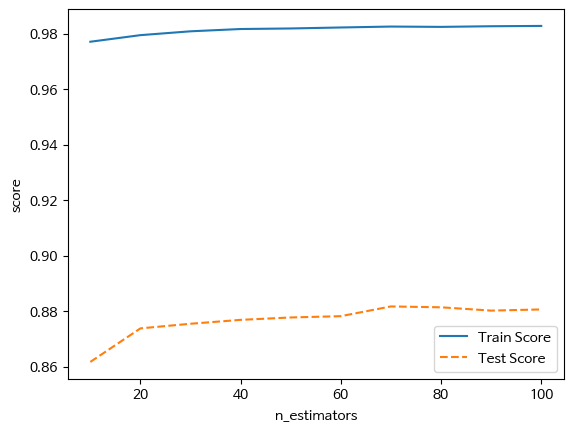

In [33]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가하며 트리 수가 30개를 초과해도 설명력이 거의 향상되지 않는것을 확인할 수 있었다. 이에 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 70을 선택하였다.

In [34]:
# train 및 test 설명력 결과 저장
train_score=[];test_score=[]
# 분할하기 위한 노드의 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1105,n_estimators=70,
                             min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinsSampleLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

df_score_leaf.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,1,0.983,0.882
1,2,0.969,0.878
2,3,0.956,0.871
3,4,0.942,0.862
4,5,0.930,0.856
5,6,0.918,0.849
6,7,0.908,0.841
7,8,0.898,0.835
8,9,0.889,0.828
9,10,0.882,0.823


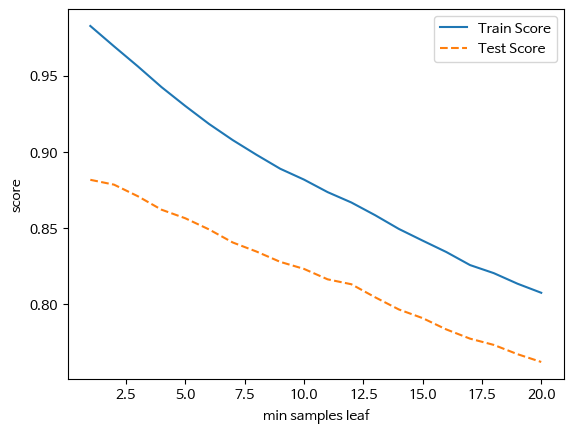

In [35]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test 데이터의 정확도 변화를 고려하여 7 선택하였다.

In [36]:
train_score=[];test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1105,n_estimators=70,min_samples_leaf=7,
                             min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinsSampleLeaf"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

df_score_split.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,4,0.908,0.841
1,6,0.908,0.841
2,8,0.908,0.841
3,10,0.908,0.841
4,12,0.908,0.841
5,14,0.908,0.841
6,16,0.903,0.838
7,18,0.897,0.834
8,20,0.891,0.829
9,22,0.886,0.825


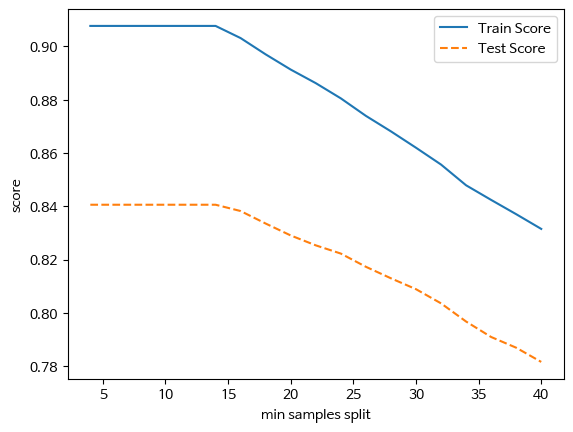

In [37]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("min samples split")
plt.legend()

분리 노드 최소 자료 수 증가에 다라 모델의 설명력은 감소하며 Train/test 데이터의 성능 변화를 고려하여 16 선택하였다.

In [38]:
# train 및 test 설명력 결과 저장 
train_score=[];test_score=[]
# 최대 깊이 변경 
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1105,n_estimators=70,
                             min_samples_leaf=7,min_samples_split=16,
                             max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

# 데이터 테이블로 저장 
df_score_depth=pd.DataFrame()
df_score_depth["MinsSampleLeaf"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

df_score_depth.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,1,0.330,0.317
1,2,0.593,0.570
2,3,0.728,0.682
3,4,0.812,0.752
4,5,0.866,0.804
5,6,0.888,0.824
6,7,0.897,0.832
7,8,0.901,0.836
8,9,0.902,0.838
9,10,0.903,0.838


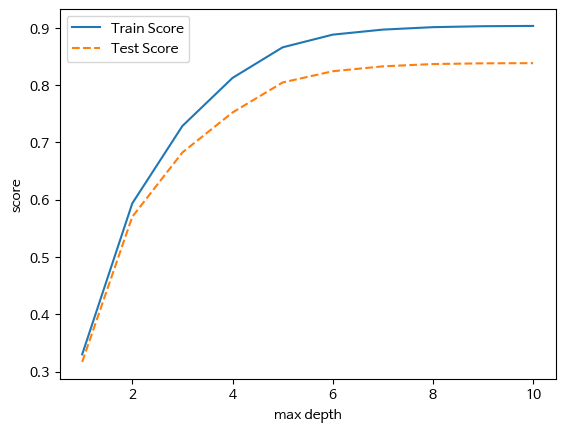

In [39]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("max depth")
plt.legend()

최대 깊이 증가에 따라 모데르이 설명력은 증가하며 Train/test 데이터의 정확도 변화를 고려하여 5 선택하였다.

In [40]:
rf_final=RandomForestRegressor(random_state=1105,n_estimators=70,min_samples_leaf=7,
                              min_samples_split=16,max_depth=5)
rf_final.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set:0.866
Score on test set:0.804


In [41]:
rf_final

RandomForestRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=16,
                      n_estimators=70, random_state=1105)

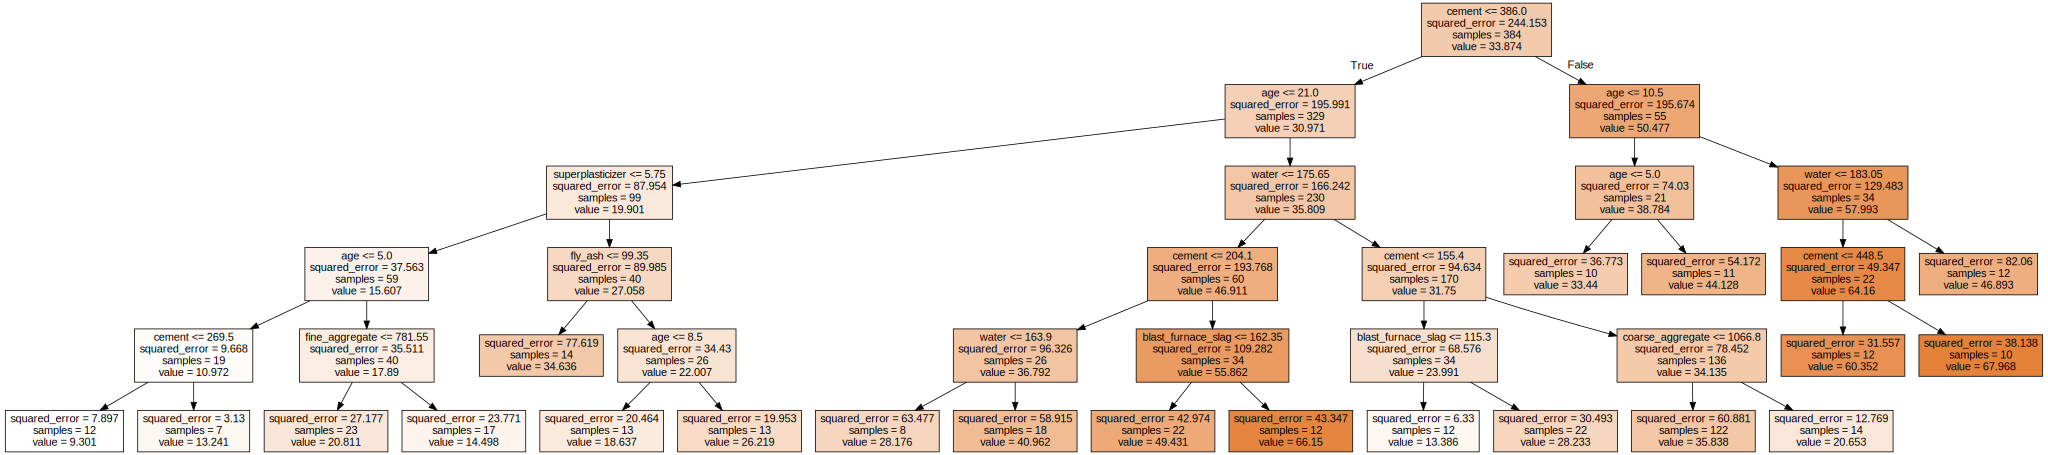

In [42]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

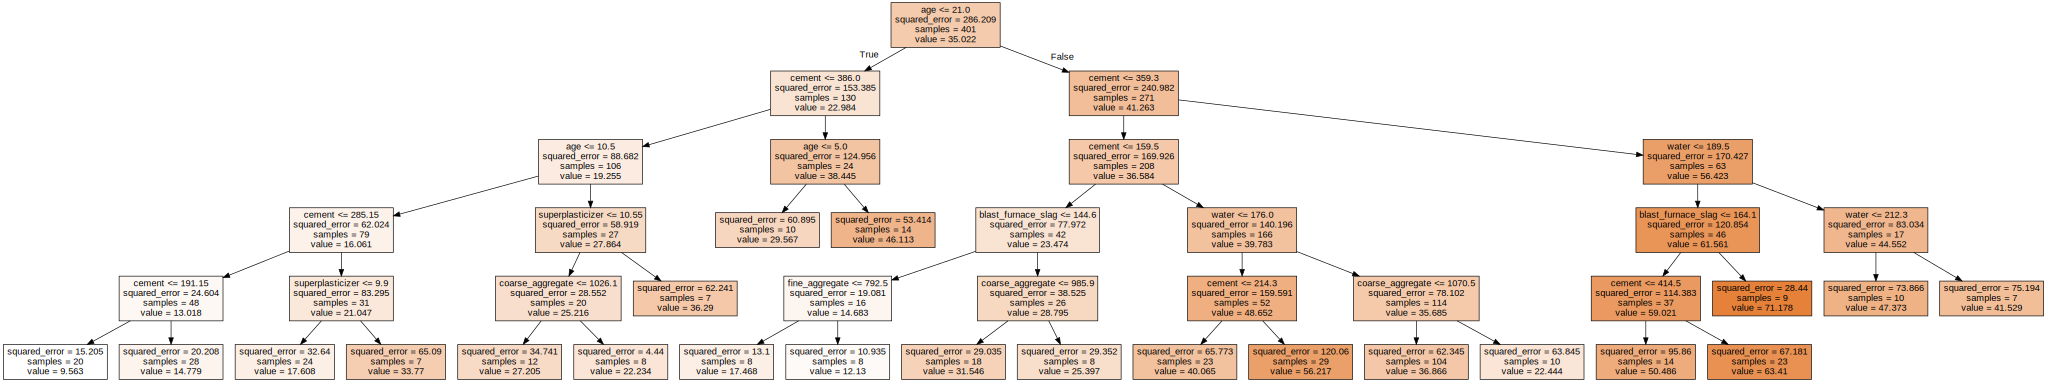

In [43]:
# 1번 트리
export_graphviz(rf_final.estimators_[1],out_file="rfr_final_1.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

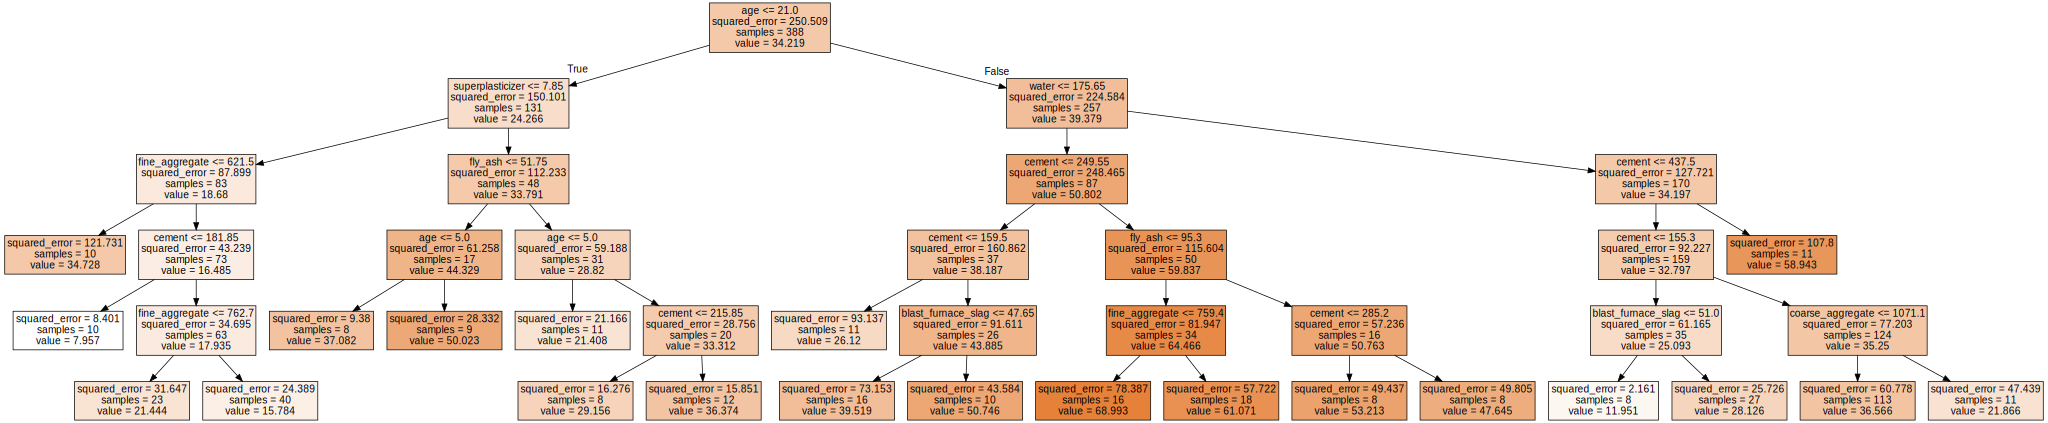

In [44]:
# 12번 트리
export_graphviz(rf_final.estimators_[12],out_file="rfr_final_10.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

위와 같은 트리 70개(n_estimators=70으로 지정)를 조합하여 최종 모델이 생성되었다.

In [45]:
# 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,cement,0.349
7,age,0.341
3,water,0.154
4,superplasticizer,0.061
1,blast_furnace_slag,0.051
6,fine_aggregate,0.024
5,coarse_aggregate,0.013
2,fly_ash,0.008


Text(0, 0.5, '변수')

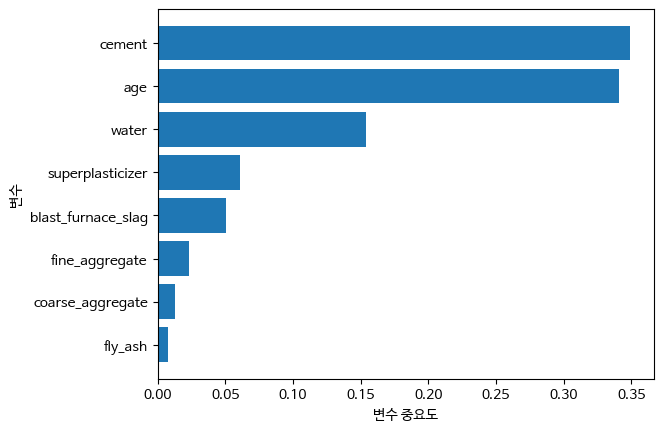

In [46]:
#설명변수 중요도 그래프 / 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [47]:
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.866
Score on test set: 0.804


In [48]:
train_pred=rf_final.predict(df_train_x)
test_pred=rf_final.predict(df_test_x)
print("train data의 결정계수:",r2_score(df_train_y,train_pred))
print("test data의 결정계수:",r2_score(df_test_y,test_pred))

train data의 결정계수: 0.8656394636965429
test data의 결정계수: 0.804297136821191


-> predict method를 활용하여 결정계수를 확인한 결과 train/test data의 결정계수(train = 0.865639 / test = 0.804297)와 위에서 구한 모델의 설명력(train = 0.866 / test = 0.804)이 동일한 값을 보이는 것을 확인할 수 있었다.

최종 모델의 설명력을 확인한 결과 train은 86.6%, test는 80.4%로 둘 다 설명력이 높으면서 차이가 작아 좋은 모델이라 생각하였습니다. 또 중요 설명 변수를 확인해보면 cement는 0.349, age는 0.341, water은 0.154으로 cement, age, water순으로 영향이 크다고 해석할 수 있다. 하지만 설명변수 중요도 값이 낮다고 해서 해당 변수가 전혀 유용하지 않다는 뜻은 아니며 다른 조건으로 나무를 생성하면 변수 중요도가 바뀔 수 있으므로 무시를 할 수는 없다.

##### predict method

In [49]:
print(rf_final.predict(df_test_x))
print("---------------------------------------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()
print("---Test y data---")
print(df_test_y.iloc[0])
print()
print("---predicted strength---")
print(rf_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[13.84462126 42.61403926 24.94661802 35.39470982 28.76794489 51.94087028
 13.17361597 41.63930252 25.83231567 32.88887833 33.46877776 60.98546331
 60.80901479 35.00286066 37.43953576 37.58070768 33.92230162 34.2164433
 14.98868399 45.21463377 26.77042771 28.87163261 15.0570776  51.32367388
 38.63988877 35.35643866 31.21076099 35.29922184 32.98663568 50.05032689
 34.43284461 20.03086569 33.62460783 46.74974817 18.67765251 23.67409682
 61.24105626 34.82069263 43.07460357 61.08857612 30.28303071 40.944822
 42.10860671 34.97387633 62.00429789 28.90068134 44.00335071 45.02796379
 21.61961656 40.67175115 39.25105294 40.74736806 67.67302036 59.02629206
 68.35179007 30.18347102 35.96848311 15.78644386 17.19775812 21.97798865
 45.80566597 32.63140405 36.12219016 44.00335071 23.58916572 38.72645107
 33.53124379 50.8482195  48.8133438  12.55169734 27.06768284 34.07702148
 18.881906   29.54412024 55.18970582 33.77771541 37.35113081 43.8225906
 44.00212031 52.18748431 55.53904593 56.84404603 37.729

### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/Concrete.csv",encoding='euc-kr')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [52]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [53]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=100)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(618, 8)
train data Y size:(618,)
test data X size:(412, 8)
test data Y size:(412,)


In [54]:
# 모델 생성
gb_uncustomized=GradientBoostingRegressor(random_state=100)
gb_uncustomized.fit(df_train_x,df_train_y)

GradientBoostingRegressor(random_state=100)

In [55]:
# Train/test 데이터 설명력
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.956
Score on test set:0.890


 모델 설명력은 train 95.6%, test 89.0%로 확인되었다.

In [56]:
# train/test 설명력 결과 저장
train_score=[];test_score=[]
# 트리 수 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=100)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

# 결과 저장
df_score_n=pd.DataFrame()
df_score_n["Estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.644,0.600
1,20,0.813,0.765
2,30,0.876,0.820
3,40,0.905,0.846
4,50,0.922,0.863
5,60,0.934,0.873
6,70,0.942,0.879
7,80,0.948,0.884
8,90,0.952,0.887
9,100,0.956,0.890


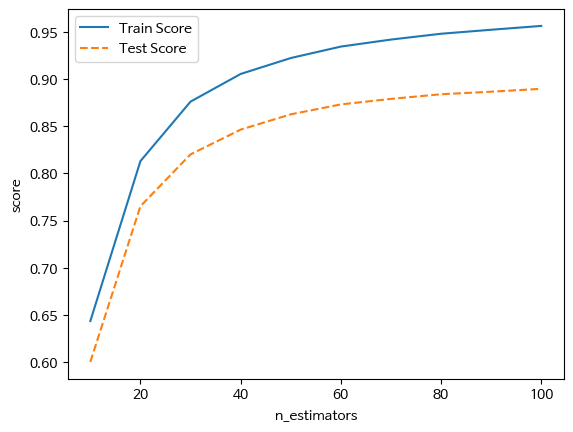

In [57]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

트리 수 증가에 따라 모델의 설명력은 지속적으로 향상되고 있으나, Test 데이터의 성능 변화를 고려하여 30을 선택하였다.

In [58]:
# train/test 설명력 결과 저장 
train_score=[];test_score=[]
# 잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=100,n_estimators=30,
                             min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

# 결과 저장 
df_score_leaf=pd.DataFrame()
df_score_leaf["MinsSampleLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

df_score_leaf.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,1,0.876,0.820
1,2,0.877,0.820
2,3,0.874,0.818
3,4,0.873,0.818
4,5,0.873,0.817
5,6,0.873,0.817
6,7,0.873,0.817
7,8,0.873,0.814
8,9,0.871,0.819
9,10,0.871,0.821


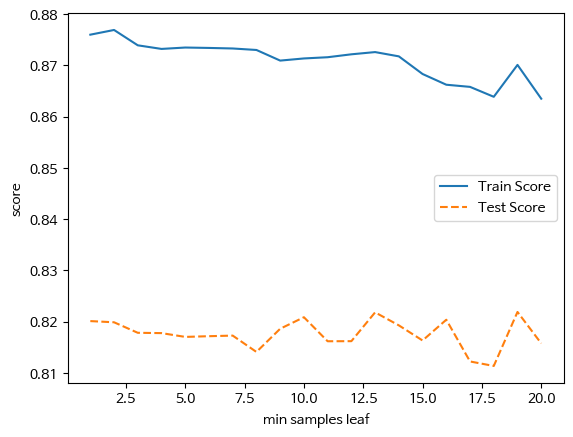

In [59]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test 데이터의 성능 변화를 고려하여 10 선택하였다.

In [60]:
# train/test 설명력 결과 저장 
train_score=[];test_score=[]
# 분할하기 위한 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=100,n_estimators=30,min_samples_leaf=10,
                             min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

# 결과 저장
df_score_split=pd.DataFrame()
df_score_split["MinsSampleLeaf"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

df_score_split.round(3)

,MinsSampleLeaf,TrainScore,TestScore
0,2,0.871,0.821
1,4,0.871,0.821
2,6,0.871,0.821
3,8,0.871,0.821
4,10,0.871,0.821
5,12,0.871,0.821
6,14,0.871,0.821
7,16,0.871,0.821
8,18,0.871,0.821
9,20,0.871,0.821


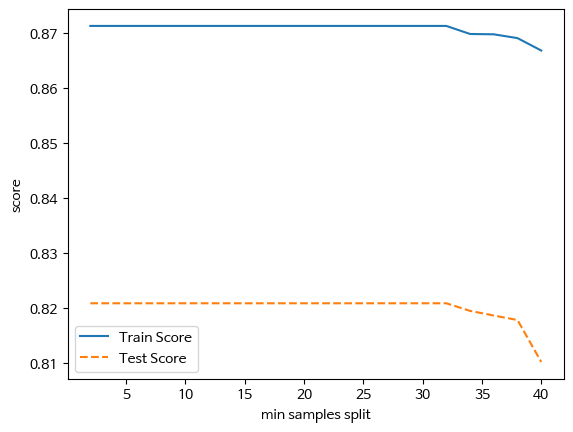

In [61]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("min samples split")
plt.legend()

분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, Train/test 데이터의 성능 변화를 고려하여 32 선택하였다. 32보다 적은 영역에서는 변화가 없다.

In [62]:
# train/test 설명력 결과 저장  
train_score=[];test_score=[]
# 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=100,n_estimators=30,
                             min_samples_leaf=10,min_samples_split=32,
                             max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.597,0.562
1,2,0.796,0.748
2,3,0.871,0.821
3,4,0.920,0.857
4,5,0.940,0.873
5,6,0.951,0.880
6,7,0.957,0.880
7,8,0.959,0.881
8,9,0.961,0.885
9,10,0.963,0.888


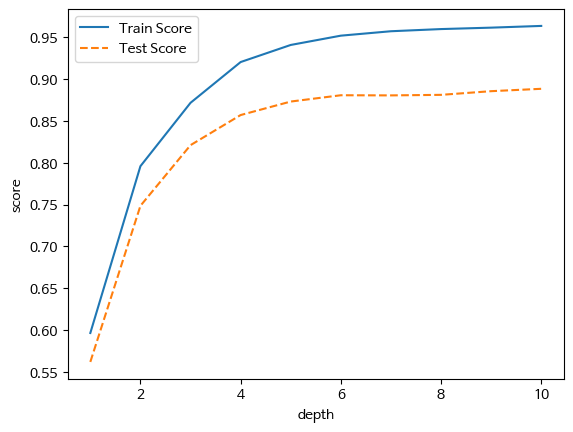

In [63]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("depth")
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가하며, test 데이터의 성능 변화를 고려하여 3 선택하였다.

In [64]:
# train/test 설명력 결과 저장 
train_score=[];test_score=[]
# 학습률 변경
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=100,n_estimators=30,
                             min_samples_leaf=10,min_samples_split=32,max_depth=3,
                             learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_lr=pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.871,0.821
1,0.2,0.926,0.867
2,0.3,0.941,0.884
3,0.4,0.949,0.881
4,0.5,0.955,0.888
5,0.6,0.952,0.880
6,0.7,0.961,0.870
7,0.8,0.955,0.861
8,0.9,0.959,0.864


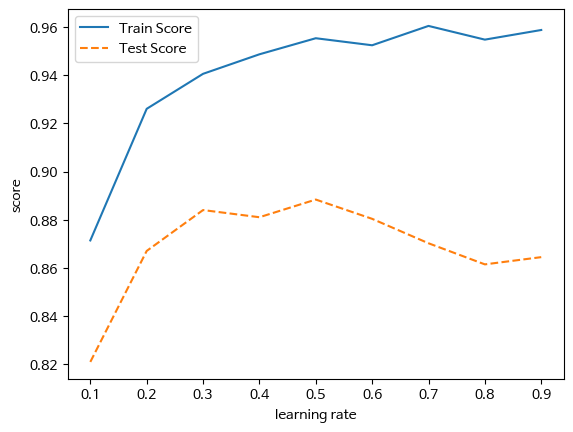

In [65]:
plt.plot(para_lr,train_score,linestyle="-",label="Train Score")
plt.plot(para_lr,test_score,linestyle="--",label="Test Score")
plt.ylabel("score");plt.xlabel("learning rate")
plt.legend()

학습률 증가에 따라 모델의 설명력은 증가하는데, 반면 test 데이터의 성능은 급격하게 저하되어 0.2 선택하였다. 0.1-0.2 사이의 세밀한 변화에 따른 성능 확인 필요하다.

In [66]:
gb_final=GradientBoostingRegressor(random_state=100,n_estimators=30,min_samples_leaf=10,
                              min_samples_split=32,max_depth=3,learning_rate=0.2)
gb_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.926
Score on test set:0.867


In [67]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

# 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,cement,0.388
7,age,0.357
3,water,0.094
1,blast_furnace_slag,0.057
6,fine_aggregate,0.044
4,superplasticizer,0.043
5,coarse_aggregate,0.009
2,fly_ash,0.007


Text(0, 0.5, '변수')

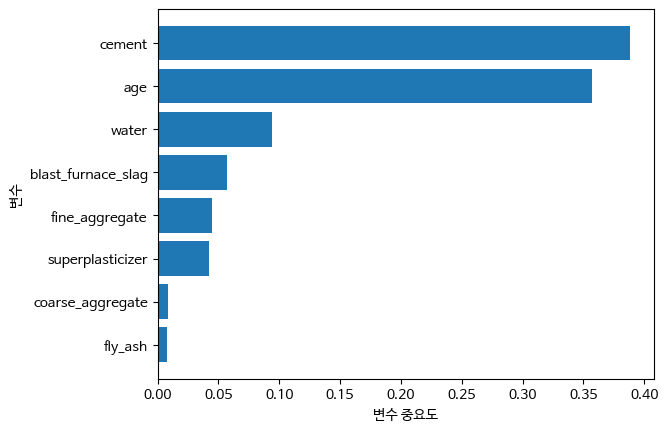

In [68]:
# 설명변수 중요도 그래프 / 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [69]:
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.926
Score on test set:0.867


In [70]:
train_pred=gb_final.predict(df_train_x)
test_pred=gb_final.predict(df_test_x)
print("train data의 결정계수:",r2_score(df_train_y,train_pred))
print("test data의 결정계수:",r2_score(df_test_y,test_pred))

train data의 결정계수: 0.9260702964574368
test data의 결정계수: 0.8669905453965947


-> predict method를 활용하여 결정계수를 확인한 결과 train/test data의 결정계수(train = 0.92607 / test = 0.86699)와 위에서 구한 모델의 설명력(train = 0.926 / test = 0.867)이 동일한 값을 보이는 것을 확인할 수 있었다.

최종 모델의 설명력을 확인한 결과 train은 92.6%, test는 86.7%로 둘 다 설명력이 높으면서 차이가 작아 좋은 모델이라 생각하였습니다. 또 중요 설명 변수를 확인해보면 cement는 0.388, age는 0.357, water은 0.094으로 cement, age, water순으로 영향이 크다고 해석할 수 있다. 하지만 설명변수 중요도 값이 낮다고 해서 해당 변수가 전혀 유용하지 않다는 뜻은 아니며 다른 조건으로 나무를 생성하면 변수 중요도가 바뀔 수 있으므로 무시를 할 수는 없다.

##### predict method

In [71]:
print(gb_final.predict(df_test_x))
print("---------------------------------------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()
print("---Test y data---")
print(df_test_y.iloc[0])
print()
print("---predicted strength---")
print(gb_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[59.13656368 68.68278833 31.51083879 10.84233565 45.2928436  24.49023585
 33.28477877 14.81239294 29.40270555 27.13462313 34.51826197 28.17405777
 62.77827799 27.46849302 67.69358776 19.87557905 49.07018136 14.98794105
 62.36258557 44.69203481 44.75372884 32.54751784 49.15951786 24.61851257
 45.62695271 42.52164589 41.74040134 45.50668997 44.84850773 31.96123049
 21.99107003 27.0610743  30.5160174  38.57510172 66.06443304 37.31454205
 57.98565244 28.71491404 27.66574201 18.4694831  38.22699073 25.06626842
 42.76809135 41.31293815 42.22793876 50.53511929 32.74361472 32.01675565
 27.9807309  50.84170106 36.25914334 51.11552176 62.64787005 37.49186261
 61.78161543 61.44903475 30.31743513 36.73731729 10.23830747 33.17680983
 32.88886532 12.68246398  9.72864297 40.54606602 74.1575479  66.06443304
 58.84594511 15.65734692 50.85872085 34.35254091 12.59047814 41.57690973
 15.1627673  37.27873653 49.73669163 75.94906897 46.61331218 13.19931928
 17.24888973 51.56969261 18.86496563 28.75401893 13

##### 결론

모델의 설명력을 기준으로 최종 모델을 비교하면 GradientBoosting-RandomForest-의사결정나무 순으로 높은 설명력을 보이는 것을 확인할 수 있었다. 하지만 예측값을 기준으로 비교를 했을때는 GradientBoosting-의사결정나무-RandomForest 순서로 나타났다.